In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.pipeline import Pipeline

# Load some crime data
headers = pd.read_csv('comm_names.txt', squeeze=True)
headers = headers.apply(lambda s: s.split()[1])
crime = (pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data', 
                    header=None, na_values=['?'], names=headers)
         .iloc[:, 5:]
         .dropna()
         )

# Set target and predictors
target = 'ViolentCrimesPerPop'
predictors = [c for c in crime.columns if not c == target]

# Train/test split
X = crime[predictors]
y = crime[[target]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [6]:
pca = PCA()
pca.fit(X_train)
Vt = pca.components_[:20, :]

In [7]:
comp0 = pd.Series(dict(zip(X_train.columns, Vt[0, :])))
comp1 = pd.Series(dict(zip(X_train.columns, Vt[1, :])))
col_order = comp0.sort_values().index

In [10]:
print comp0[:10]

AsianPerCap             0.044906
FemalePctDiv           -0.063415
HispPerCap              0.038605
HousVacant             -0.074056
LandArea               -0.041116
LemasGangUnitDeploy    -0.025459
LemasPctOfficDrugUn    -0.020079
LemasPctPolicOnPatr     0.040073
LemasSwFTFieldOps       0.016802
LemasSwFTFieldPerPop   -0.020051
dtype: float64


In [11]:
col_order

Index([u'racepctblack', u'PctVacantBoarded', u'PctSpeakEnglOnly', u'PctIlleg',
       u'PctHousNoPhone', u'PctPopUnderPov', u'PctBornSameState',
       u'PctPolicBlack', u'PctVacMore6Mos', u'pctWPubAsst',
       ...
       u'racePctAsian', u'RentHighQ', u'OwnOccLowQuart', u'OwnOccMedVal',
       u'OwnOccHiQuart', u'PctRecentImmig', u'PctRecImmig10', u'PctRecImmig5',
       u'PctForeignBorn', u'PctRecImmig8'],
      dtype='object', length=121)

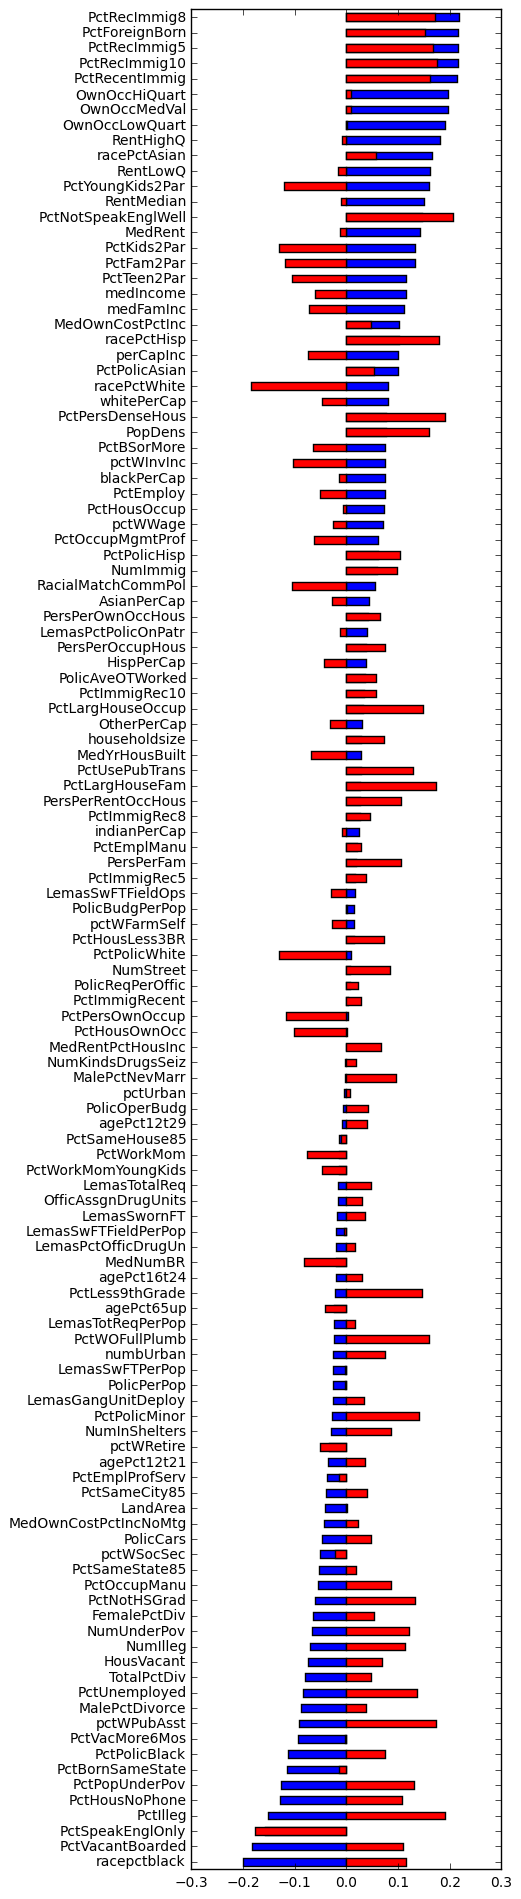

In [14]:
plt.figure(figsize=(4, 24))
comp0[col_order].plot(kind='barh')
comp1[col_order].plot(kind='barh', color='red')

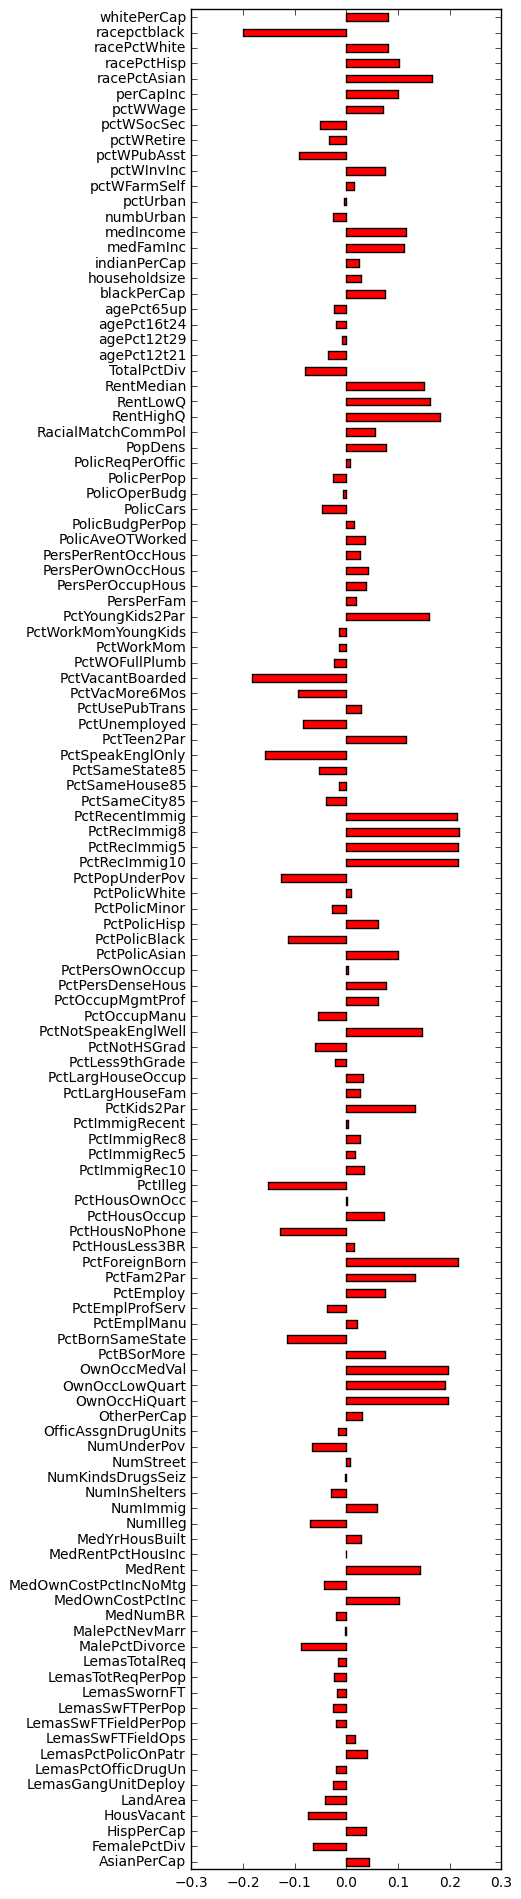

In [21]:
plt.figure(figsize=(4, 24))
comp0.plot(kind="barh", color="red")

## Matplotlib plot examples

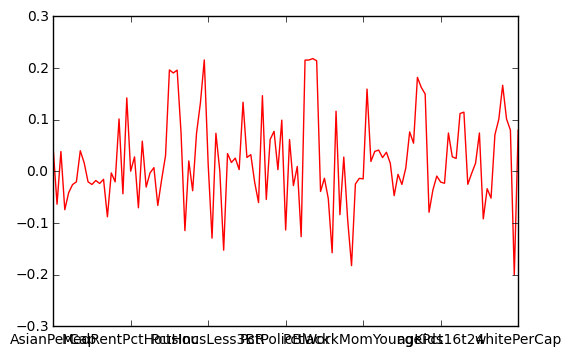

In [22]:
# plt.figure(figsize=(4, 24))
comp0.plot(kind="line", color="red")

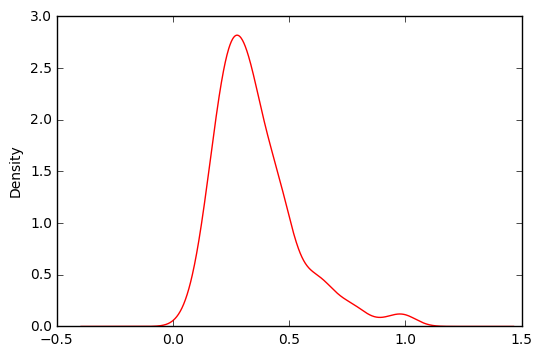

In [24]:
X_train.PctBSorMore.plot(kind="kde", color="red")

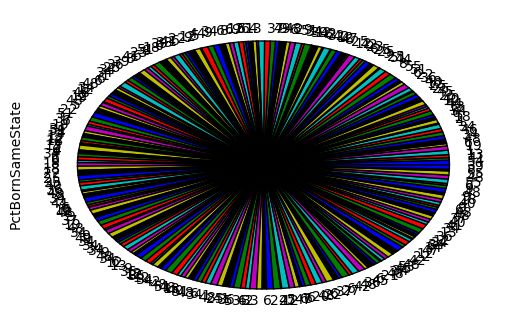

In [34]:
# plt.figure(figsize=(20, 3))
X_train.PctBornSameState.plot(kind="pie")